# Linear Regression
----------------

For our very first lesson, we'll go over something called linear regression. What is it exactly? Linear regression is just a fancy term for something which you probably somewhat already covered in high school. Do you remember best fit lines in high school math? It was you trying to estimate and draw a straight line through a bunch of points. These points were plotted on a graph and were arranged in a way which appeared that they were going in the same direction. I hope you're going "oh yeah, I remember that!" Because that's linear regression! Let's go through it with some code...

## 1.1 Making a Mock Dataset

Before we start, let's import a couple libraries which we'll use to create our mock dataset. We'll use this mock dataset throughout this chapter to really deep dive into linear regression. We'll make our mock dataset using sklearn (short for scikit-learn) - a very widely used machine learning library in Python. We won't be covering it in this book, but it has a nice built-in function (specifically its "make_regression" function) for easily making mock datasets. As for matplotlib, it's an easy-to-use barebones data science library in Python to plot graphs.

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

Now that we've imported the libraries, let's use sklearn's make_regression function to make our mock dataset. Don't worry too much about the details regarding the arguments being passed to the function. All you need to know is that we're going to make 100 mock data points. Each point has a distinct x and y coordinate.

In [2]:
X, y = make_regression(n_samples=100, n_features=1, bias=5, noise=5, random_state=762)
y = y.reshape(-1, 1)

Now that we have our mock data, let's use matplotlib to visualize it.

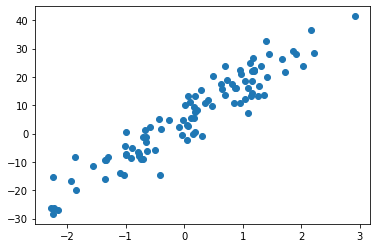

In [3]:
plt.scatter(X, y)
plt.show()

I'm hoping that what you're seeing in the plot above is somewhat what you expected to see. What you're seeing is 100 distinct points. All of which seem to be going in the same direction. If you squint your eyes, you'll see that the points on the graph somewhat make a shape which looks kind of like a straight line.

## 1.2 Drawing Our Best Fit Line

Now, it's almost time to draw our best fit line. Before we can do that, let's just quickly go over the definition of a line in math. If you remember from high school math, a line can be defined as y=m*x+b, where m represents the slope, x represents a position on the x-axis and b represents the bias. If none of that made any sense, that's OK. Playing with the code below should clear it up. I've started you off with values for m and b, but to really understand how m and b effect the red line below, make sure you give them different values and re-run the code. Change the values for m and b individually so that you can see how they affect the line.

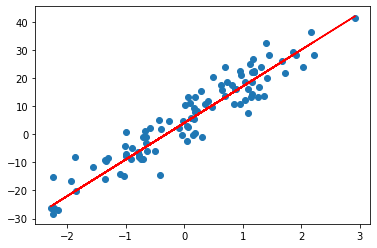

In [4]:
m, b = 13, 4

y_pred = []
for x in X:
    y_pred.append(m*float(x) + b)
plt.scatter(X, y)
plt.plot(X, y_pred, 'r')
plt.show()

You'll see in the code above that we're plotting 2 different things - the actual points and the line. The line is defined by our formula y=m*x+b. We loop over each x value in order to get our y value of the line at that point. There you have it, linear regression!... Well, kinda...

## 1.3 Finding the Best Fit

So we kinda sorta found a best fit line above. It was us just guessing random values for m and b which made it look like the line is going through the points on the graph in a balanced way - in a way which we think represents the general shape of our data well enough that we can take it to be our "best fit" line.

Now, how would you code it so that all of this happens automatically, and your algorithm finds a good best fit line for you? The way I've done it below is semi-automated. I start with the slope (m) and the bias (b) set to 0 and then I keep incrementing them during every iteration (epoch) by values, which I randomly chose. I decided to set my last iteration (epoch) to be at a number, not too high and not too low, which I think gives me a good best fit line. This time don't play with the values for the slope and the bias, instead, play with the number of epochs to see how it effects the output.

Just on the side, I'm importing 2 more libraries which are used for demo purposes only. These libraries (time and IPython) have nothing to do with the actual algorithm. I placed the functions from these 2 libraries between comments in the actual algorithm, so that you can ignore that part.

In [5]:
import time
from IPython import display

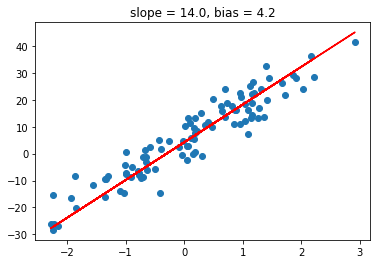

In [6]:
slope = 0
bias = 0
epochs = 15

for epoch in range(epochs):
    y_pred = []
    for x in X:
        y_pred.append(slope*float(x) + bias)

    ######demo purpose only#####
    display.display(plt.gcf())
    display.clear_output(wait=True)
    ##########plotting##########
    plt.scatter(X, y)
    plt.plot(X, y_pred, 'r')
    plt.title('slope = {0:.1f}, bias = {1:.1f}'.format(slope, bias))
    plt.show()
    ############################

    slope += 1
    bias += 0.3

## 1.4 Mean Squared Error

So far, we've come to realize a couple things. We saw that the slope and the bias are the numbers which influence the line, and that linear regression is synonymous to a best fit line. The question I want you to think about now is, what is it that you're looking at to determine what is a best fit line? In your mind, what are you doing? How I'd define it is that you're doing a comparison of the "best fit" line and the points on the graph. The further away the line is to the points, the less likely that line is to be considered a "best fit" line. Let's look at an example. Run the 2 cells below to output the graphs used for this example.

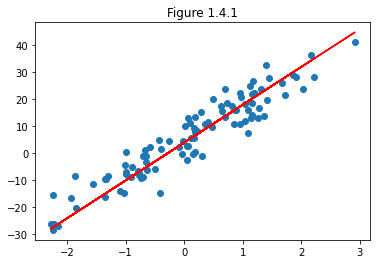

In [7]:
m, b = 14, 4

y_pred = []
for x in X:
    y_pred.append(m*float(x) + b)
plt.scatter(X, y)
plt.plot(X, y_pred, 'r')
plt.title('Figure 1.4.1')
plt.show()

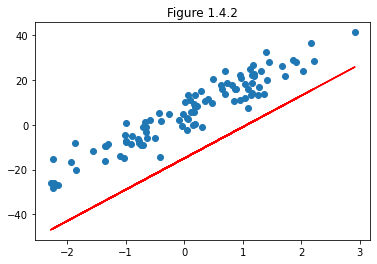

In [8]:
m, b = 14, -15

y_pred = []
for x in X:
    y_pred.append(m*float(x) + b)
plt.scatter(X, y)
plt.plot(X, y_pred, 'r')
plt.title('Figure 1.4.2')
plt.show()

Looking at Figure 1.4.1 and Figure 1.4.2, which would you deem to be a better fit? Figure 1.4.1 is clearly the better fit. Why? Because, in general, it's closer to the points.

Is there a mathematical way to get one number to see how far, on average, the line is to the points? Yes, there is! We're going to use something known as a loss function. The loss function we'll being using for linear regression is the mean squared error (MSE). For each point, it finds the distance with its respective x value on the line. The equation does that for all the points and then gets the average.

Let's write it out in a function.

In [9]:
def mse(y, y_pred):                       ## mean squared error
    summation = 0.                        ## variable for holding the sum of the distances
    n = y.shape[0]                        ## get the amount of points
    for i in range(n):                    ## for each point
        summation += (y[i]-y_pred[i])**2  ## get the distance between the point and its respective x value on the "best fit" line and square it                                       
    return float(summation/n)             ## return the average distance as 1 number

The above seems all good and well, but a visualization would probably explain it better. Run the cell below to see our MSE in action. The graph on the left is the graph with our regression points and the graph on the right is the MSE value at each epoch.

<Figure size 432x288 with 0 Axes>

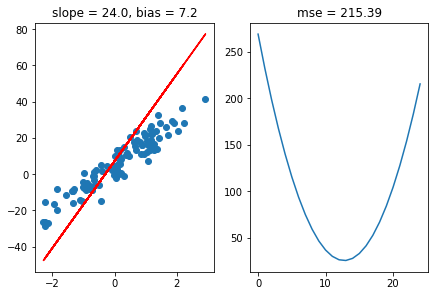

In [10]:
epoch_loss = []

slope = 0
bias = 0

for epoch in range(25):
    y_pred = []
    for x in X:
        y_pred.append(slope*float(x) + bias)
    loss = mse(y, y_pred)
    epoch_loss.append(loss)

    ######demo purpose only#####
    display.display(plt.gcf())
    display.clear_output(wait=True)
    ##########plotting##########
    fig, (ax0, ax1) = plt.subplots(ncols=2, constrained_layout=True)
    ax0.scatter(X, y)
    ax0.plot(X, y_pred, 'r')
    ax0.set_title('slope = {0:.1f}, bias = {1:.1f}'.format(slope, bias))
    ax1.set_title('mse = {0:.2f}'.format(loss))
    ax1.plot(epoch_loss)
    plt.show()
    time.sleep(1)
    ############################

    slope += 1
    bias += 0.3

Now that we have a good understanding of our loss function, we see how much value it can bring us in fitting our best fit line with confidence. We see that the lowest value for MSE gives us a really good best fit line. The question now is, how do we automate it so that our algorithm finds the optimal MSE without us having to manually increment the slope and bias values?

Before we move on, just a reminder, us incrementing the slope by 1 and bias by 0.3 at each epoch was manually chosen. Those values are fine for this mock dataset, but most probably will not hold true for a different dataset. Those incrementation values are what we're trying to have our algorithm automatically find.

## 1.5 Gradient Descent

We've finally made it to gradient descent! This is the part we've been waiting for. It allows us to automatically find the correct values to update the slope and bias. But before we move forward, let's just recap the steps we've taken to get to this point up until now:

1. We made our mock dataset and plotted it.
2. We randomly chose our initial values for our slope and bias for our best fit line.
3. We plotted a best fit line with our values for the slope and bias.
4. At every epoch, we evaluated our line with respect to our MSE.
5. We assigned random values to our slope and bias to update by. This step is what we intend to use calculus on in order to be able to automate it and remove the random part.
6. We updated our slope and bias, in order to improve our MSE.
7. Repeat steps 3–6 until satisfied with the MSE.

Going back to gradient descent. If you were looking at the U-shaped MSE graph in 1.4 and thinking calculus, then you're one step ahead. If calculus didn't come to your mind, you're probably wondering how calculus will help us in our quest to automatically find the lowest MSE. Let's take a moment to clarify it. If you remember our MSE graph in 1.4, then you'll remember that the graph looked like a valley - the optimal value being at the bottom of the valley. Calculus is just a tool to calculate the slope at a given point. Understanding the steepness of the slope and the direction of it allows us to understand in what direction we should be heading to be able to reach the bottom of the valley. Us slowly "descending" the valley is why this process is known as gradient descent.

In this book, we won't cover the rules of calculus nor will we being going over the derivation of the equations. I do suggest that you go over it and there are many good resources online, but it's not necessary once we get into PyTorch. Regardless, for the purposes of our exercise, I'll be providing you with the formulae which were derived using partial derivatives (i.e., calculus).

The derivative of the MSE with respect to the slope is X * (y-y_pred). <br/>
The derivative of the MSE with respect to the bias is 1 * (y-y_pred), which is the same as just (y-y_pred).

Awesome! We now have all the equations we need to automatically fit this line and be sure that it is in fact a best fit for our dataset. Now let's run the cell below and see it in action!

<Figure size 432x288 with 0 Axes>

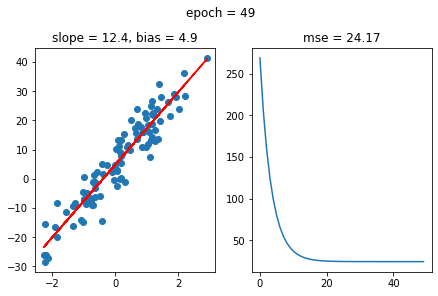

In [11]:
epoch_loss = []

slope = 0.
bias = 0.
learning_rate = 1e-3
n = X.shape[0]


for epoch in range(50):
    y_pred = []
    for x in X:
        y_pred.append(slope*float(x) + bias)
    loss = mse(y, y_pred)
    epoch_loss.append(loss)

    ######demo purpose only#####
    display.display(plt.gcf())
    display.clear_output(wait=True)
    ##########plotting##########
    fig, (ax0, ax1) = plt.subplots(ncols=2, constrained_layout=True)
    fig.suptitle('epoch = {0}'.format(epoch))
    ax0.scatter(X, y)
    ax0.plot(X, y_pred, 'r')
    ax0.set_title('slope = {0:.1f}, bias = {1:.1f}'.format(slope, bias))
    ax1.set_title('mse = {0:.2f}'.format(loss))
    ax1.plot(epoch_loss)
    plt.show()
    time.sleep(1)
    #############################
  
    ###derivatives of mse with respect to slope and bias###

    ###zero-ing out the gradients###
    D_mse_wrt_slope = 0.
    D_mse_wrt_bias = 0.
    ###performing back propagtion for each point on the graph###
    for i in range(n):
        D_mse_wrt_slope += float(X[i]) * (float(y[i]) - float(y_pred[i]))
        D_mse_wrt_bias += float(y[i]) - float(y_pred[i])
  
    ###updating the slope and bias###
    slope += learning_rate * D_mse_wrt_slope
    bias += learning_rate * D_mse_wrt_bias

Wow, that was cool! We could have probably stopped at 20 epochs, but I wanted to show how robust our calculations actually are. No matter how many epochs you go for, it just keeps getting better and better. The power of math. Who knew all those high school math courses were actually worth something?

You're probably looking at the code and realizing a few things. The first thing is that there's a variable added known as the learning_rate. What is that? Remember I told you that calculus allows us to find out the how steep the slope is at a given point and hence guides us in descending down to the valley? Well, the learning rate is just a number which tells our algorithm how big the step should be in our desired direction. It lets our algorithm know if we should be tip toeing down the slope, or if we should be running down.

Try different values for the learning rate and re-run the cell to see how it effects our algorithm. Try the value 1e-2 and then try 1e-4. Also, how did I come up with 1e-3? Unfortunately, I lied and not everything is 100% automated. That value was chosen via trial and error, but incrementing/decrementing with 10 to the power of a number is a good rule to go by.

The other thing you're probably seeing is that we set the partial derivative variables (i.e., gradients) to 0 during every epoch. This is an important step to make sure your gradients aren't adding up. Try removing that and seeing how it effects the algorithm.

## 1.6 No Loops!

So far in this chapter, we've used loops to do our summations. We've also used loops to calculate our y values for our regression line (i.e., best fit line). A little secret about machine learning practitioners is that they hate loops. They try every trick in the book to get away from loops. Why? Because it's computationally expensive and it's not parallelizable.

In order to get away from loops, we're going to import a famous library known as NumPy. It's a very powerful library used for linear algebra.

In [12]:
import numpy as np

Now that we've imported it, let's rewrite our MSE function using NumPy.

In [13]:
def mse(y, y_pred): ##mean squared error
  return np.sum((y - y_pred)**2)/y.shape[0]

That's it! Using NumPy's sum function, we were able to reduce our summation loop into only 1 line!

Let's see how we can implement the rest of the code using NumPy and remove the loops.

<Figure size 432x288 with 0 Axes>

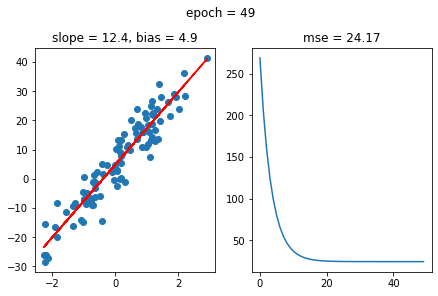

In [14]:
epoch_loss = []

slope = 0.
bias = 0.
learning_rate = 1e-3

for epoch in range(50):
    ##changed##
    y_pred = slope*X + bias
    ###########
    loss = mse(y, y_pred)
    epoch_loss.append(loss)

    ######demo purpose only#####
    display.display(plt.gcf())
    display.clear_output(wait=True)
    ##########plotting##########
    fig, (ax0, ax1) = plt.subplots(ncols=2, constrained_layout=True)
    fig.suptitle('epoch = {0}'.format(epoch))
    ax0.scatter(X, y)
    ax0.plot(X, y_pred, 'r')
    ax0.set_title('slope = {0:.1f}, bias = {1:.1f}'.format(slope, bias))
    ax1.set_title('mse = {0:.2f}'.format(loss))
    ax1.plot(epoch_loss)
    plt.show()
    time.sleep(1)
    ############################

    ###derivatives of mse with respect to slope and bias###

    ##changed##
    D_mse_wrt_slope = np.sum(X * (y - y_pred))
    D_mse_wrt_bias = np.sum(y - y_pred)
    ###########

    slope += learning_rate * D_mse_wrt_slope
    bias += learning_rate * D_mse_wrt_bias

Amazing! Without loops, if we don't count the lines used for plotting, we were able to perform linear regression using gradient descent in only 10 lines!

There are two things I wish to point out before ending this chapter. The first point is that you probably realized that I'm not explicitly zero-ing out the gradients. The reason for that is because we don't need to. Since we're not using loops anymore, the new values for the gradients just replace the old ones. The second point is that you'll see that I've also gotten rid of the loop for our regression line equation. How could I do that? Well, because of the parallelization of the equation (essentially means that the same equation is happening over and over again in a loop format), it's an excellent candidate for NumPy. In the background, NumPy is treating it as a matrix calculation, and if you know about linear algebra, you know that for every row in a matrix, all the calculations can be done simultaneously.

## 1.7 Linear Regression's Computation Graphs

Below, you should find the computation graph for linear regression. It's a nice and simple diagram which sums up the steps to linear regression using gradient descent. The process starts at the left and goes to the right. You'll see that the 2 circles on the far left represent our inputs, the circle in the middle is our regression line equation and the circle on the far right represents our loss function, which is MSE for this case. Going left to right is known as forward propagation and then going right to left (which is done using calculus) is known as backpropagation.

![linear%20regression.png](images/linear%20regression.png?raw=true)

Now that you've had a chance to look at the diagram above, you must be thinking where'd the 1 come from? We'll address that in Chapter 4: Pima Indians Diabetes Dataset.